<a href="https://colab.research.google.com/github/sushanted/ml/blob/master/Information%20Theory/Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy 

Very good article : https://arxiv.org/pdf/1405.2061.pdfb

Consider a system where there are 5 symbols, A,B,C,D,E having probabilities of occurences as follows.

$ A : \frac{1}{16} $  
$ B : \frac{1}{16} $  
$ C : \frac{2}{16} $  
$ D : \frac{4}{16} $  
$ E : \frac{8}{16} $  

Note the numbers in above probabilites are purposefully taken to be power of 2.  

We can create a binary code with 3 bits to represent all these symbols.  

A : 000  
B : 001  
C : 010  
D : 011  
E : 100  

And finally construct a message BEEDEEDEECEEDACD as 001.100.100.011.100.100.011.100.100.010.100.100.011.000.010.011 which requires 16 * 3 = 48 bits in total.   

16 symbols in 48 bits, $\frac{48}{16} = 3$ bits per symbol (which is obvious because of fixed length encoding).    

Note that the message follows the frequency of the characters in the system (8 Es, 4 Ds, 2 Cs and 1 A,B).  

Instead of this, be can utilize the knowledge of the frequency/probability for each symbol in the system and can create a variable length code (Huffman encoding), which can be decoded as well due to no suffix sharing (unique suffixes: 0,1,11,111).  


A : 1111  
B : 1110  
C : 110  
D : 10  
E : 0

The same message now can be constructed as 1110.0.0.10.0.0.10.0.0.100.0.0.10.1111.110.10 which requires only 8 * 1 + 4 * 2 + 2 * 3 + 4 * 1 + 4 * 1 = 30 bits.  

16 symbols in 30 bits, $\frac{30}{16} = 1.875$ bits per symbol.  

In general we can observe a similar compression in all the messages in the system which follow the same probability distribution for symbols A,B,C,D and E.  



#### How did we create the above encoding?


We are trying to minimize the average size of the messages.  

High probability symbols should be encoded with minimal bits so the average message size (which contains high number of high probability of symbols) would be minimal.  

Low probability symbols can be encoded with the remaining number of symbols, due to low probability those symbols will rarely occur in any message and thus even if they have more number of bits, the total contribution to the complete message still would be low.  

In general to represent N symbols we need $log_2(N)$ bits, as b bits can represent $N = 2^b$ symbols. 

E has probability $\frac{8}{16}$ which means, half of the times (8/16) the symbol is E. With a single binary bit, we can tell if the symbol is E or any other symbol, therefore one bit is sufficient (and efficient due to high probability) to encode presence of E. Or in other words, 16 can be divided into two groups of size 8: one which contains all Es and other containing the other symbols and $log_2(\frac{16}{8})=log_2(2) = 1$ bit is sufficient (and again efficient) to represent the two groups: 0-> E, 1 ->{A,B,C,D}     

D has probability $\frac{4}{16}$ which mean, $\frac{1}{4}$ th times the symbol is D. We can divide the total 16 possibilities into 4 groups, among which D can be represented as one group (having all D's in the group) and remaining symbols can be represented by remaining 12 possibilities. $log_2(\frac{16}{4})=log_2(4) = 2$ bits are sufficient (and again efficient) to represent the group of all Ds. 

C has probability $\frac{2}{16}$ which mean, $\frac{1}{8}$ th times the symbol is C. We can divide the total 16 possibilities into 8 groups, among which C can be represented as one group (having all C's in the group) and remaining symbols can be represented by remaining 14 possibilities. $log_2(\frac{16}{2})=log_2(8) = 3$ bits are sufficient (and again efficient) to represent the group of all Cs.     

A,B have probability $\frac{1}{16}$ which mean, $\frac{1}{16}$ th times the symbol is C. We can divide the total 16 possibilities into 16 groups of size 1, among which A,B can be represented as one group each (having A or B in the group) $log_2(\frac{16}{1})=log_2(16) = 4$ bits are sufficient to represent A and B.  

![huffman_coding](https://github.com/sushanted/ml/blob/master/Information%20Theory/Huffman_coding.png?raw=1)  

Source: https://www.geogebra.org/graphing/nypxv7sq  


For a message in this system which follows the probability distribution mentioned before, follows the exptected no. of bits per symbol in the message:  
E(bits per message) = $\sum_i p_i b_i$   

Where $p_i$ is the probability of a symbol and $b_i$ is the number of bits required to represent the symbol.  

For our system:  

$\sum_i p_i b_i$ = $ \frac{8}{16}log_2(\frac{16}{8}) + \frac{4}{16}log_2(\frac{16}{4}) + \frac{2}{16}log_2(\frac{16}{2}) + \frac{1}{16}log_2(\frac{16}{1}) + \frac{1}{16}log_2(\frac{16}{1}) $  
$= 0.5 * 1 + 0.5 + 0.375 + 0.25 + 0.25 $  
$ = 1.875$  

Note: this is exactly same as the calculation for a sample message above.  

We can correlated b with p, as we observed in our bit calculations, $b = log_2(\frac{1}{p})$  

Number of bits required to represent a symbol is log of receiprocal of its probability.  

So we can improvise our formula as:  


E(bits per message) = $\sum_i p_i log_2(\frac{1}{p_i}) = -\sum_i p_i log_2(p_i)$   

This is the exact Shannon's entropy formula.  

Note: In the cases where the probabilities (nominator and denominator) are power of 2, the encoding's bits per message converges to the entropy (As in our case). For non power-2 probabilities, due to possible inefficient representation in integral number of bits, the number of bits per message don't converge to the entropy value. There are encodings like arithmetic encoding (https://en.wikipedia.org/wiki/Arithmetic_coding) where the complete messages can be represented in the form of a string of bits. An example : https://commons.wikimedia.org/wiki/File:Arithmetic_coding_visualisation_circle.svg#/media/File:Arithmetic_coding_visualisation_circle.svg  










#### Research : Why entropy is the lower bound on the required storage?



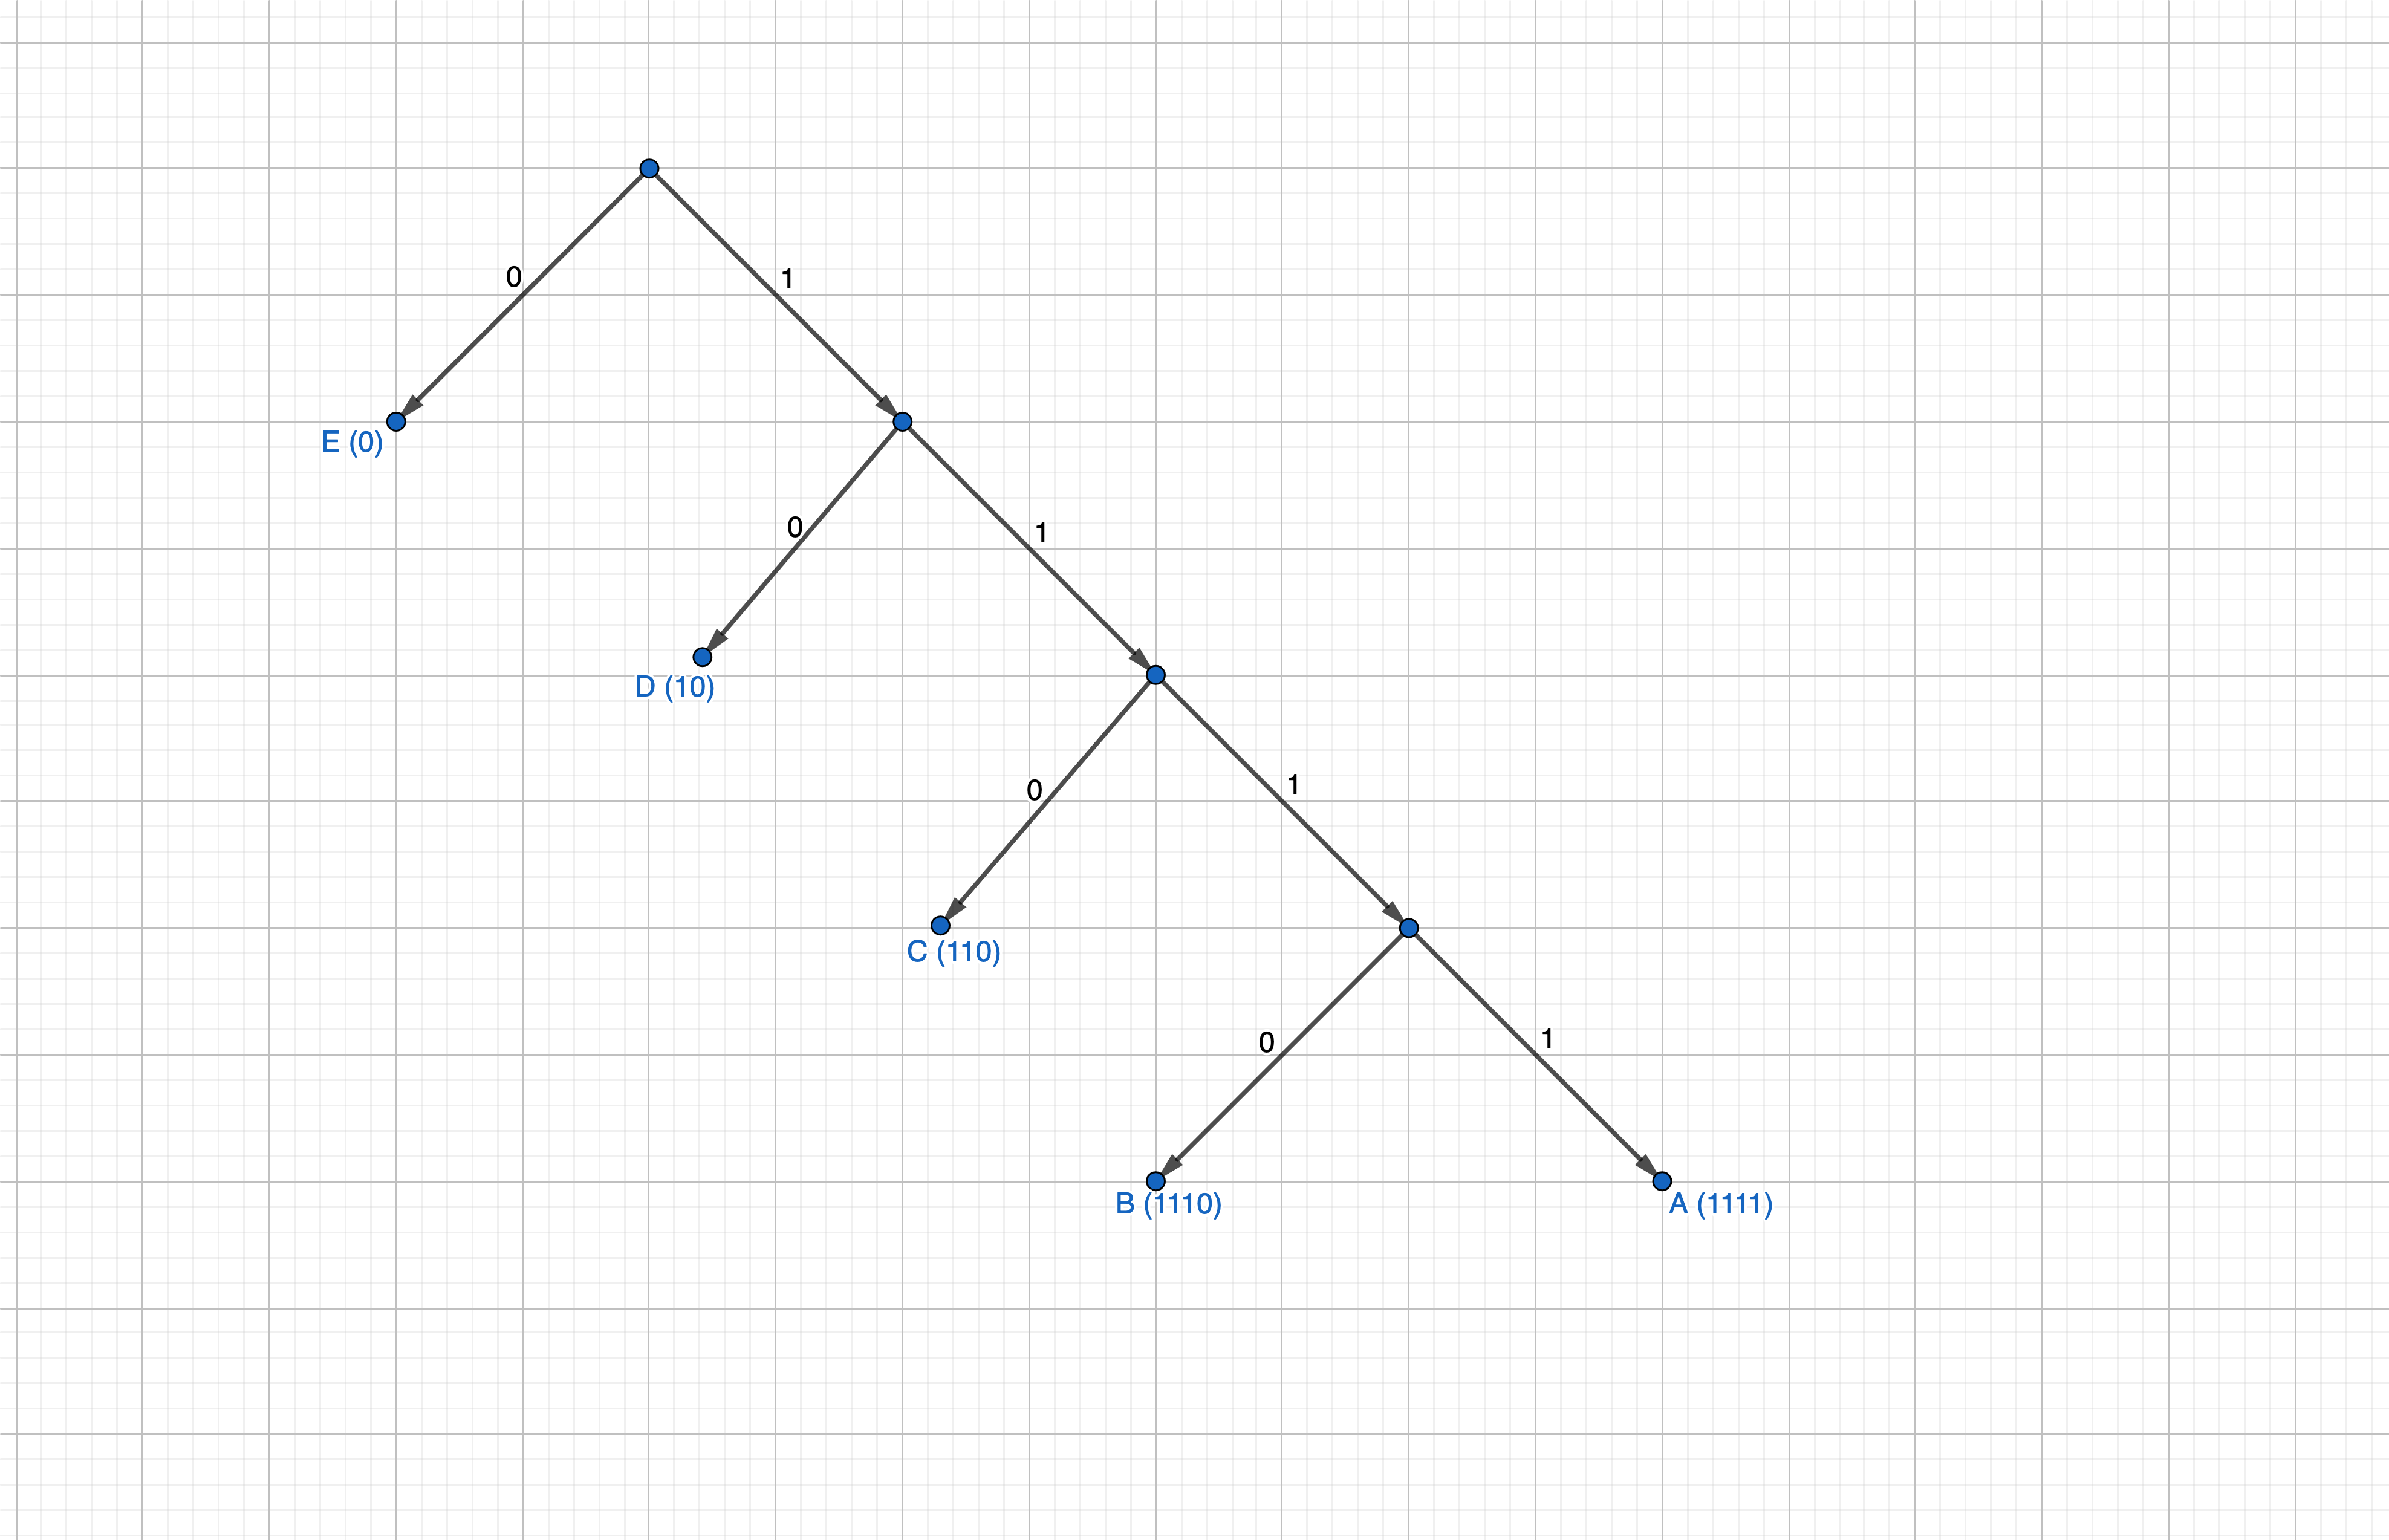

In [2]:
a = 3+4
print(a)

7
